This notebook visualizes simulated data generated by `sim_counts_interactions_power_analysis.R`, which generates data to be used with GLiMMIRS-int for a power analysis.

In [1]:
library(ggplot2)
library(rhdf5)
library(patchwork)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

First, we will load the simulated data.

In [2]:
h5.path = "/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/sim.h5"

h5ls(h5.path)

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,coeffs,H5I_DATASET,COMPOUND,13000
1,/,counts,H5I_GROUP,,
2,/counts,lambda100_size0.5,H5I_DATASET,INTEGER,13000 x 50000
3,/counts,lambda100_size1,H5I_DATASET,INTEGER,13000 x 50000
4,/counts,lambda100_size3,H5I_DATASET,INTEGER,13000 x 50000
5,/counts,lambda100_size5,H5I_DATASET,INTEGER,13000 x 50000
6,/counts,lambda100_size7,H5I_DATASET,INTEGER,13000 x 50000
7,/counts,lambda15_size0.5,H5I_DATASET,INTEGER,13000 x 50000
8,/counts,lambda15_size1,H5I_DATASET,INTEGER,13000 x 50000


The simulated data can be used for a power analysis examining the effects of different values of $\lambda$ (which controls simulated MOI) and interaction effect sizes (magnitude of $\beta_{AB}$) on our power to detect true interaction effects (where $\beta_{AB} \neq 0$). Thus, we have different counts matrices corresponding to different values of $\lambda$ and $\beta_{AB}$ used for the simulation. Each one is stored in the h5 file as `/counts/lambda{lambda}_size{effect_size}`. Corresponding values of the linear predictor are stored in the h5 file under `/linear_predictor/lambda{lambda}_size{effect_size}`.

Different perturbation probabilities for enhancer A ($X_A$) and enhancer B ($X_B$), as well as the joint perturbation probability ($X_{AB}$), are calculated for different values of $\lambda$. This is because different $\lambda$ values yield different assignments of gRNAs in cells, leading to different perturbation probabilities for each enhancer across cells. These are stored in the h5 file under `/x/x_{a/b/ab}/{lambda}`. 

# "Positive" vs. "negative" enhancer pairs
In our simulated dataset, we designate "positive" and "negative" pairs of enhancers. For both cases, each enhancer in the pair has a true regulatory effect on their common target gene ($\beta_A, \beta_B \neq 0$). A "positive" pair of enhancers also has a true epistatic-like interaction effect between them ($\beta_{AB} \neq 0$), while a "negative" pair of enhancers has no epistatic-like interaction effect between them ($\beta_{AB}=0$), and their combined effect on the target gene's expression should follow the multiplicative model. This information is recorded as `pairs` in the h5 file. It is stored as a dataframe containing the identifiers of the target enhancers A and B; the identifier of the target gene; the effect sizes of the enhancers A and B; and whether the pair is a "positive" or "negative" pair.

In [3]:
enh.pairs <- h5read(h5.path, "pairs")

head(enh.pairs)

,tsA,tsB,target.genes,betaA,betaB,set
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,809,815,2034,-1.429745,-1.094701,positive
2,336,656,6755,-1.977948,-3.334392,positive
3,282,991,4280,-2.977532,-3.877645,positive
4,798,932,4372,-2.284241,-2.914137,positive
5,510,910,7677,-2.397124,-4.049980,positive
6,341,377,497,-1.469571,-3.760419,positive


We can see how many positive and negative pairs we have:

In [4]:
enh.pairs %>% group_by(set) %>% summarise(npairs = n())

set,npairs
<chr>,<int>
negative,500
positive,500



# Examine different simulated MOIs ($\lambda$)

For this example, we simulated data for several different values of $\lambda$, which are stored in the h5 file as `lambda`:

In [5]:
lambdas <- h5read(h5.path, "lambda")
lambdas

[1]  15  25  50  75 100

Let's take a look at how each one affects the distribution of cells that contain gRNAs perturbing both enhancers in a "positive" pair, which we defined as pairs of enhancers with a true interaction effect ($\beta_{AB} \neq 0$). The number of cells that each positive pair is perturbed in for each value of $\lambda$ is stored in the `ncells_per_pair.csv` file generated by  `sim_counts_interactions_power_analysis.R`.

In [6]:
ncells.per.pair <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/ncells_per_pair.csv")
colnames(ncells.per.pair)[1:length(lambdas)] <- lambdas # correct the colnames 
head(ncells.per.pair)

,15,25,50,75,100,pair
,<int>,<int>,<int>,<int>,<int>,<int>
1,11,24,111,270,448,1
2,7,26,120,274,486,2
3,9,27,125,247,457,3
4,4,20,123,251,455,4
5,8,44,110,285,448,5
6,7,36,106,276,472,6


Plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



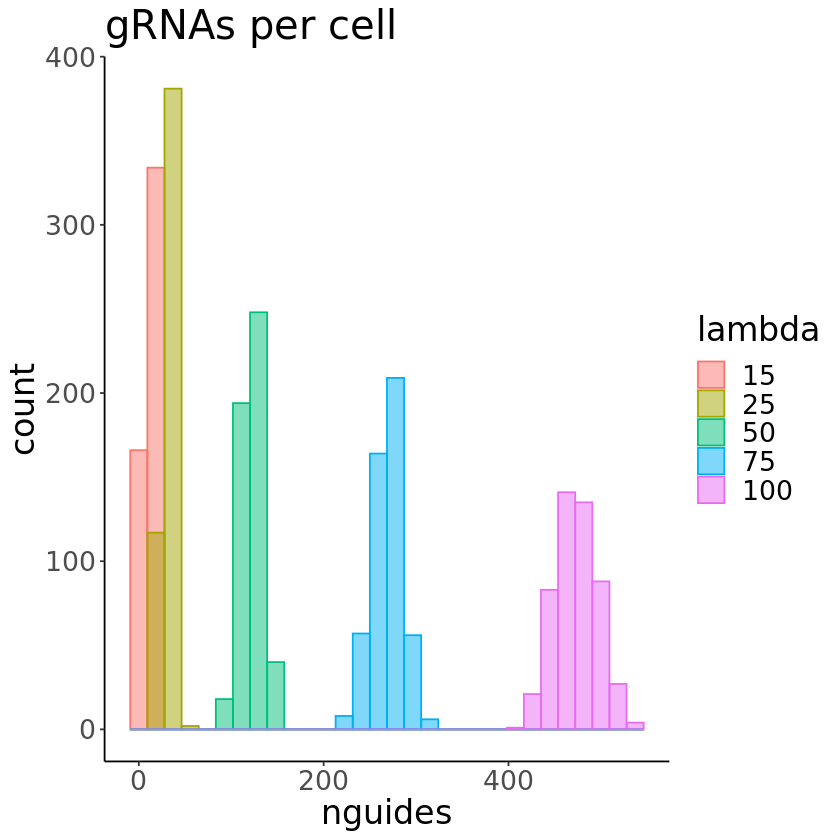

In [34]:
ncells.per.pair.plotdf <- ncells.per.pair %>% 
                            tidyr::pivot_longer(-pair, names_to = "lambda", values_to = "nguides")

ncells.per.pair.plotdf$lambda <- factor(ncells.per.pair.plotdf$lambda, levels = sort(lambdas))

ggplot(ncells.per.pair.plotdf, aes(x = nguides, color = lambda, fill = lambda)) + 
                            geom_histogram(alpha = 0.5, position = "identity") + 
                            theme_classic() +
                            theme(text = element_text(size = 20)) +
                            ggtitle("gRNAs per cell")


# Guide efficiencies

Guide efficiencies are stored in the h5 file under `/guides/guide_target_map`. This dataframe contains the gRNA identifier, the identifier of the gene whose enhancer is targeted by this gRNA, and the efficiency of the gRNA.

In [35]:
guide.target.map <- h5read(h5.path, "guides/guide_target_map")

head(guide.target.map)

,guides,target,efficiencies
,<int>,<int>,<dbl>
1,1,1,0.6376212
2,2,2,0.5628769
3,3,3,0.6661405
4,4,4,0.3764292
5,5,5,0.8813040
6,6,6,0.7663569
